In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [156]:
data = pd.read_csv("German Credit Cards UCI.csv")
data.head()

,Customer ID,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,...,Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Telephone,Foreign Worker Status,Loan Status
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,fully paid
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,charged off
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,fully paid
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,fully paid
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,charged off


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Customer ID                                          1014 non-null   int64 
 1   Checking Account Status                              1014 non-null   object
 2   Loan Duration (Months)                               1014 non-null   int64 
 3   Credit History                                       1014 non-null   object
 4   Purpose                                              1014 non-null   object
 5   Loan Amount                                          1014 non-null   int64 
 6   Savings Account Balance                              1014 non-null   object
 7   Present Employment Time (Years)                      1014 non-null   object
 8   Installment Rate in Percentage of Disposable Income  1014 non-null   int64 
 9

In [158]:
data["Loan Status"].value_counts()

fully paid     711
charged off    303
Name: Loan Status, dtype: int64

In [159]:
encoder = OneHotEncoder(sparse=False)

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Customer ID                                          1014 non-null   int64 
 1   Checking Account Status                              1014 non-null   int64 
 2   Loan Duration (Months)                               1014 non-null   int64 
 3   Credit History                                       1014 non-null   int64 
 4   Purpose                                              1014 non-null   int64 
 5   Loan Amount                                          1014 non-null   int64 
 6   Savings Account Balance                              1014 non-null   int64 
 7   Present Employment Time (Years)                      1014 non-null   int64 
 8   Installment Rate in Percentage of Disposable Income  1014 non-null   int64 
 9

In [223]:
def add_intercept(a):
    a_ext = np.zeros((a.shape[0], a.shape[1]+1))
    a_ext[:, 0] = 1
    a_ext[:, 1:] = a
    return a_ext

class SVMClassification(object):
    def __init__(self, learning_rate=0.003, lam=0.1, max_iter=1000):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.lam = lam
        self.w = None
        self.history_w = []
        self.errors = None
        self.loss = None
    
    def predict(self, X: np.array) -> np.array:
        x_ext = add_intercept(X)
        return np.sign(x_ext @ self.w)
        
    def hinge_loss(self, x, y):
        return max(0, 1 - y*(x @ self.w))
                       
    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self.lam * (self.w @ self.w)
        
    def fit(self, X, Y, verbose=False):
        X = add_intercept(X)
        Y = np.where(y <= 0, -1, 1)
        self.w = np.random.normal(loc=0, scale=0.05, size=X.shape[1])
        self.history_w.append(self.w)
        errors = []
        loss_epoch = []
        
        for epoch in range(self.max_iter): 
            err = 0
            loss = 0
            for i, x in enumerate(X):
                margin = Y[i] * (x @ self.w)
                if margin >= 1: 
                    self.w -= self.learning_rate * self.lam * self.w / self.max_iter
                    loss += self.soft_margin_loss(x, Y[i])
                else:
                    self.w += self.learning_rate * (Y[i] * x - self.lam * self.w / self.max_iter)
                    err += 1
                    loss += self.soft_margin_loss(x, Y[i])
                self.history_w.append(self.w)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'.format(epoch, err, loss))
            errors.append(err)
            loss_epoch.append(loss)            
        self.history_w = np.array(self.history_w)    
        self.errors = np.array(errors)
        self.loss = np.array(loss_epoch)

epoch 0. Errors=679. Mean Hinge_loss=538.9684834809213
epoch 1. Errors=304. Mean Hinge_loss=436.4329665374162
epoch 2. Errors=303. Mean Hinge_loss=435.7893922509792
epoch 3. Errors=303. Mean Hinge_loss=435.022196299201
epoch 4. Errors=303. Mean Hinge_loss=434.2594328522965
epoch 5. Errors=303. Mean Hinge_loss=433.5010763012942
epoch 6. Errors=303. Mean Hinge_loss=432.74710118518
epoch 7. Errors=303. Mean Hinge_loss=431.9974821900409
epoch 8. Errors=303. Mean Hinge_loss=431.2521941482146
epoch 9. Errors=304. Mean Hinge_loss=430.6969410988834
epoch 10. Errors=304. Mean Hinge_loss=430.6619684248912
epoch 11. Errors=303. Mean Hinge_loss=430.30284233032376
epoch 12. Errors=303. Mean Hinge_loss=429.56734513713417
epoch 13. Errors=303. Mean Hinge_loss=428.8360973079916
epoch 14. Errors=303. Mean Hinge_loss=428.10907429202757
epoch 15. Errors=303. Mean Hinge_loss=427.3862516802171
epoch 16. Errors=304. Mean Hinge_loss=427.2383118505544
epoch 17. Errors=303. Mean Hinge_loss=426.5745987601889
ep

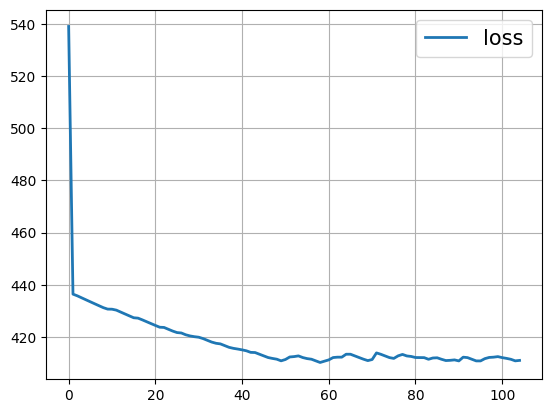

In [229]:
scaler = StandardScaler()
X = data.drop('Loan Status', axis=1)
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
X = np.hstack((np.ones((X.shape[0], 1)), X))
X = scaler.fit_transform(X)
Y = data['Loan Status']
svm = SVMClassification(learning_rate=0.003, lam=0.1, max_iter=105)
svm.fit(X, Y, verbose = True)

plt.plot(svm.loss, linewidth=2, label='loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()